In [25]:
import pandas as pd

<Axes: ylabel='Frequency'>

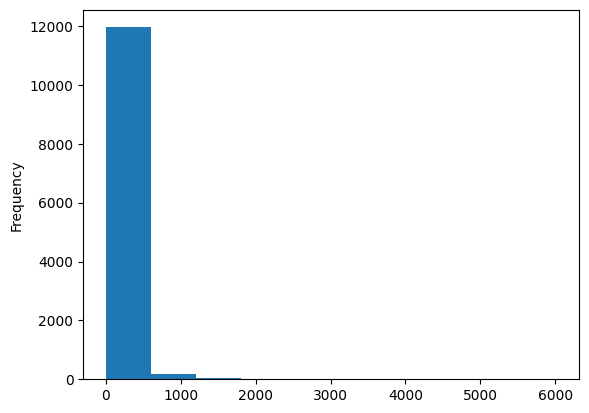

In [26]:
df = pd.read_csv('../resource/processed_data/openstack_code_msg_metrics_2000/openstack.csv', index_col=0, header=0)
df.head()
df['num_added'].plot(kind='hist')

In [17]:
a_p01 = train_df['num_added'].quantile(0.01)
a_p99 = train_df['num_added'].quantile(0.99)
d_p01 = train_df['num_deleted'].quantile(0.01)
d_p99 = train_df['num_deleted'].quantile(0.99)

,commit_id,timestamp,msg,codes,num_added,num_deleted,kinds
0,00057454f6609871c2cabf874876d26a6d0d0641,1358516662,"['add lun# provider_location nexenta driver.',...",['cinder / tests / test _ nexenta . py <added_...,2.0,2.0,train
1,0007d255d9b20da4e5bbcdbaf5813104fbc092da,1358353428,['ensure zeros written clearing volumes note o...,['cinder / volume / drivers / lvm . py <added_...,9.0,6.0,train
2,005ff1100a11c83808471ece313d0f9001f4653c,1374603627,['factorize code nfs.py glusterfs.py suppresse...,['cinder / volume / drivers / glusterfs . py <...,101.0,165.0,train
3,006d673d24778abe6c47e3ee7e1a19e163912440,1367348740,['fix lhn driver allow backend name configurat...,['cinder / volume / drivers / san / hp _ lefth...,15.0,12.0,train
4,0094303e36cf1c01db539a1eea7771ebcb4d336a,1346864368,['sync improvements config file generator tool...,['tools / conf / extract _ opts . py <added_co...,143.0,0.0,train


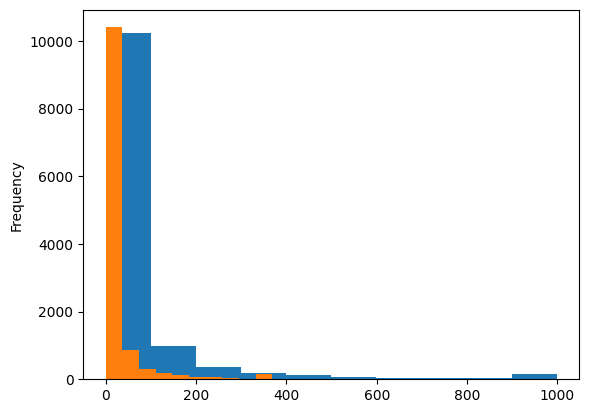

In [18]:
df['num_added'] = df['num_added'].clip(a_p01, a_p99)
df['num_deleted'] = df['num_deleted'].clip(d_p01, d_p99)
df['num_added'].plot(kind='hist')
df['num_deleted'].plot(kind='hist')
df.head()

,commit_id,timestamp,msg,codes,num_added,num_deleted,kinds
0,00057454f6609871c2cabf874876d26a6d0d0641,1358516662,"['add lun# provider_location nexenta driver.',...",['cinder / tests / test _ nexenta . py <added_...,0.001003,2.0,train
1,0007d255d9b20da4e5bbcdbaf5813104fbc092da,1358353428,['ensure zeros written clearing volumes note o...,['cinder / volume / drivers / lvm . py <added_...,0.008022,6.0,train
2,005ff1100a11c83808471ece313d0f9001f4653c,1374603627,['factorize code nfs.py glusterfs.py suppresse...,['cinder / volume / drivers / glusterfs . py <...,0.100274,165.0,train
3,006d673d24778abe6c47e3ee7e1a19e163912440,1367348740,['fix lhn driver allow backend name configurat...,['cinder / volume / drivers / san / hp _ lefth...,0.014038,12.0,train
4,0094303e36cf1c01db539a1eea7771ebcb4d336a,1346864368,['sync improvements config file generator tool...,['tools / conf / extract _ opts . py <added_co...,0.142389,0.0,train


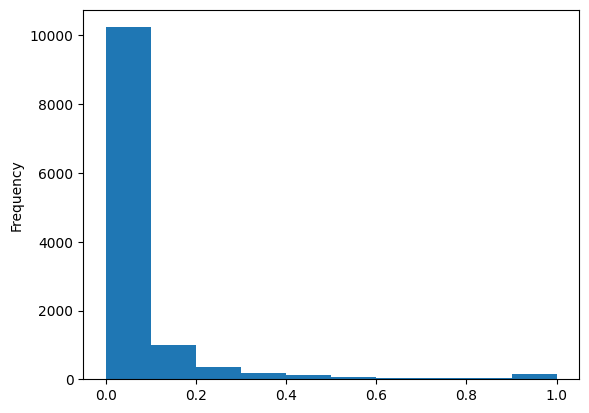

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df = df[df['kinds'] == 'train']
scaler.fit(train_df[['num_added']])

df['num_added'] = scaler.transform(df[['num_added']])
df['num_added'].plot(kind='hist')
df.head()




,commit_id,timestamp,msg,codes,num_added,num_deleted,kinds
0,00057454f6609871c2cabf874876d26a6d0d0641,1358516662,"['add lun# provider_location nexenta driver.',...",['cinder / tests / test _ nexenta . py <added_...,0.001003,0.005426,train
1,0007d255d9b20da4e5bbcdbaf5813104fbc092da,1358353428,['ensure zeros written clearing volumes note o...,['cinder / volume / drivers / lvm . py <added_...,0.008022,0.016277,train
2,005ff1100a11c83808471ece313d0f9001f4653c,1374603627,['factorize code nfs.py glusterfs.py suppresse...,['cinder / volume / drivers / glusterfs . py <...,0.100274,0.447628,train
3,006d673d24778abe6c47e3ee7e1a19e163912440,1367348740,['fix lhn driver allow backend name configurat...,['cinder / volume / drivers / san / hp _ lefth...,0.014038,0.032555,train
4,0094303e36cf1c01db539a1eea7771ebcb4d336a,1346864368,['sync improvements config file generator tool...,['tools / conf / extract _ opts . py <added_co...,0.142389,0.000000,train


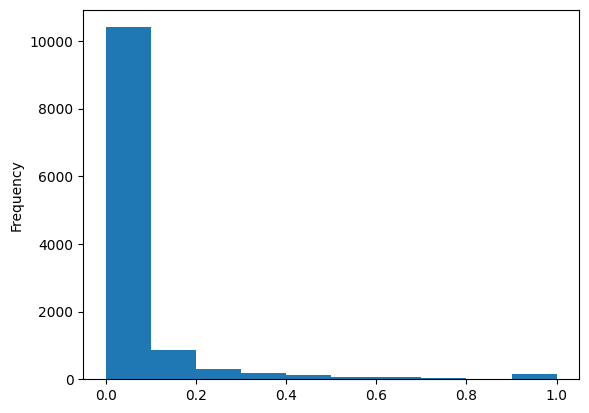

In [20]:
scaler.fit(train_df[['num_deleted']])
df['num_deleted'] = scaler.transform(df[['num_deleted']])
df['num_deleted'].plot(kind='hist')

df.head()

In [22]:
df.to_csv('../resource/processed_data/openstack_code_msg_metrics_2000/oepnstack3.csv')

In [24]:
import pandas as pd
df_label = pd.read_csv('../resource/openstack.csv', index_col=0, header=0)
df2 = pd.merge(df[['commit_id','timestamp', 'msg', 'codes','num_added','num_deleted','kinds']], df_label[['commit_id', 'buggy']])
df2.rename(columns={'buggy': 'label'}, inplace=True)
df2.to_csv('../resource/processed_data/openstack_code_msg_metrics_2000/openstack_data2.csv')
df2.head()

,commit_id,timestamp,msg,codes,num_added,num_deleted,kinds,label
0,00057454f6609871c2cabf874876d26a6d0d0641,1358516662,"['add lun# provider_location nexenta driver.',...",['cinder / tests / test _ nexenta . py <added_...,0.001003,0.005426,train,False
1,0007d255d9b20da4e5bbcdbaf5813104fbc092da,1358353428,['ensure zeros written clearing volumes note o...,['cinder / volume / drivers / lvm . py <added_...,0.008022,0.016277,train,False
2,005ff1100a11c83808471ece313d0f9001f4653c,1374603627,['factorize code nfs.py glusterfs.py suppresse...,['cinder / volume / drivers / glusterfs . py <...,0.100274,0.447628,train,False
3,006d673d24778abe6c47e3ee7e1a19e163912440,1367348740,['fix lhn driver allow backend name configurat...,['cinder / volume / drivers / san / hp _ lefth...,0.014038,0.032555,train,False
4,0094303e36cf1c01db539a1eea7771ebcb4d336a,1346864368,['sync improvements config file generator tool...,['tools / conf / extract _ opts . py <added_co...,0.142389,0.000000,train,False
